# Introduction
Dünya Mutluluk Raporu, küresel mutluluğun durumunun önemli bir araştırmasıdır.
Bu defter Dünya Mutluluk Raporuyla ilgilidir. Çeşitli faktörler incelenerek ve ülkelerin mutluluk düzeylerinin analizleri yapılacaktır. 
<font color = 'purple'>
1. [Importing Library](#1)
2. [Load and Check Data](#2)
3. [Variable Description](#3)
4. [Missing Value](#4)
5. [Data Analysis](#5)

<a id = "1"></a><br>
# 1. Importing Library

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-pastel")
import plotly.express as px  #for map
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from collections import Counter
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [386]:
#plt.style.available

#### **Bu kodu kullanarak farklı stilleri görebiliriz.**

<a id = "2"></a><br>

# 2. Load and Check Data

In [387]:
data1=pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding='latin1')
data2=pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding='latin1')

#### **Dosya, utf-8 kodlaması dışında bir karakter kodlamasıyla kaydedildiği için Python, utf-8 ile dosyayı okurken bazı karakterleri çözemiyor. Bu yüzden dosyayı dönüştürmek yerine, daha geniş bir karakter seti sunan latin-1 kodlamasıyla doğrudan okuyarak hata çözüldü.**

In [388]:
diff = set(data1.columns).symmetric_difference(set(data2.columns))
print(diff)

{'Ladder score', 'Dystopia + residual', 'lowerwhisker', 'Positive affect', 'Regional indicator', 'Healthy life expectancy at birth', 'Life Ladder', 'Healthy life expectancy', 'Negative affect', 'year', 'upperwhisker'}


### **data1 ve data2 içindeki farklı değerler gösterildi.**

### **columns** fonksiyonunu kullanarak csv dosyalarının içinde hangi sutünların verileri olduğu görülür.

In [389]:
data1.columns  

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [390]:
data2.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

### **unique()** fonksiyonu, belirtilen sütundaki tekrarsız (eşsiz) değerleri tek bir kez döndürür.

In [391]:
data1['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

In [392]:
data2['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Bahrain',
       'Croatia', 'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica',
       'Peru', 'Dominican Republic', 'Mauritius', 'Moldova', 'Russia',
       'Boli

In [393]:
data1['Country name'].nunique()

165

In [394]:
data2['Country name'].nunique()

143

### **nunique()** fonksiyonu ile Country name sutünunu kullanrak data1 ve data2 içinde kaç tane ülke olduğu bilgisine ulaştık.

In [395]:
data1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [396]:
data2.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


#### **head()** fonksiyonu ile data1 ve data2 verilerinin ilk 5 veri satırı alındı.

<a id = "3"></a><br>
# 3. Variable Description
<font color = 'blue'>

#### 1. Life Ladder
#### 2. Ladder score
#### 3. upperwhiske
#### 4. Healthy life expectancy at birth
#### 5. Positive affect
#### 6. year
#### 7. Negative affect
#### 8. lowerwhisker
#### 9. Dystopia + residual
#### 10. Regional indicator
#### 11. Healthy life expectancy

### **describe()** fonksiyonu, sayısal sütunlar için temel istatistiksel özetler döndürür.

In [397]:
data1.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [398]:
data2.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


### **info()** fonksiyonu, verinin genel bilgilerini görüntülemek için kullanılır. Veri kümesinin yapısı, sütun adları, veri türleri, eksik değerler ve bellek kullanımı gibi önemli bilgileri verir.

In [399]:
data1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [400]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


<a id = "4"></a><br>

# 4. Missing Value
### Veri içinde eksik veri(NaN, None) tespit işlemi ve bu verileri silme işlemi yapılacaktır.

In [401]:
data1.columns[data1.isnull().any()]  

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [402]:
data2.columns[data2.isnull().any()]  

Index(['Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

### data1 ve data2 içinde hangi sutünlarda eksk verilerin oluğu tespit edildi.

### **Sadece data1 verisini alarak eksik verilerin tespitini aşağıdaki kodlama işlemleriyle ile yaptık.**

####        1. data1.isnull().sum(): Her sütundaki eksik (NaN) değerlerin toplamını hesaplar.
####        2. data1.isnull().sum(): Bu sonucu missing_values değişkenine kaydeder.
####        3. missing_values komutu çalıştırıldığında, veri çerçevesindeki her sütunun kaç eksik değer içerdiğini gösterir.


In [403]:
missing_values=data1.isnull().sum() 
missing_values                 

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [404]:
missing_values_list = missing_values[missing_values > 0].reset_index().values.tolist()
print(missing_values_list)

[['Log GDP per capita', 28], ['Social support', 13], ['Healthy life expectancy at birth', 63], ['Freedom to make life choices', 36], ['Generosity', 81], ['Perceptions of corruption', 125], ['Positive affect', 24], ['Negative affect', 16]]


### **Verilerde NaN ifadeleri liste haline getirildi.**
### 1. missing_values[missing_values > 0]: Eksik (NaN) değer içeren sütunları seçer.
### 2. .reset_index(): Sütun isimlerini bir DataFrame'e dönüştürür.
### 3. .values.tolist(): Bu DataFrame’i liste formatına çevirir.

In [405]:
for i in missing_values_list:
    filling_data=data1[data1[i[0]].isnull()]

filling_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
31,Algeria,2010,5.464,9.306,NaN,65.500,0.593,-0.212,0.618,NaN,NaN
135,Bahrain,2014,6.165,10.802,NaN,65.960,NaN,NaN,NaN,NaN,NaN
559,Djibouti,2010,5.006,7.934,NaN,54.600,0.764,-0.072,0.597,NaN,NaN
1058,Jordan,2018,4.639,9.168,0.800,67.600,0.762,-0.189,NaN,NaN,NaN
1059,Jordan,2019,4.453,9.163,0.793,67.600,0.726,-0.168,NaN,NaN,NaN
1060,Jordan,2020,4.094,9.125,0.709,67.600,0.779,-0.154,NaN,NaN,NaN
1123,Kuwait,2014,6.180,10.926,NaN,70.000,NaN,NaN,NaN,NaN,NaN
1294,Maldives,2018,5.198,9.893,0.913,69.775,0.855,0.013,NaN,NaN,NaN
1419,Morocco,2010,4.383,8.821,NaN,62.500,0.663,-0.173,0.900,NaN,NaN
1666,Philippines,2006,4.670,8.562,0.795,61.360,0.828,0.058,0.841,0.756,NaN


#### Döngü (for i in missing_values_list), eksik verisi olan her sütun için çalışır.
#### 1. i[0]: Sütunun adını temsil eder (örn: "Country").
#### 2. data1[i[0]].isnull(): Belirtilen sütundaki NaN (eksik) olan satırları seçer.
#### 3. filling_data: Eksik verileri içeren satırları saklayan bir DataFrame olur.

In [406]:
filling_data = filling_data.dropna(subset=[column_name])

In [407]:
for column_name in filling_data:
    filling_data = filling_data.dropna(subset=[column_name]) #dropna fonksiyonu ile belirtilen sütunda (column_name) eksik (NaN) olan satırları veri kümesinden siler.

filling_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect


In [408]:
filling_data.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [409]:
filling_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect


#### **Öncelikle bu kodlamayla hangi verilerin eksik olduğu tespit edildi. Tespit edilen değerler bir liste haline getirilerek boş kalan değerleri dropna fonksiyonu ile çıkarılması sağlandı**
#### **En sondaki iki kodda NaN değerlerinin boşaltıldığı görülmektedir.**

<a id = "5"></a><br>
# 5. Data Analysis


### 5.1 Yıllara Göre Ülkelerdeki Life Ladder (Yaşam Merdiveni) Değişimi

In [410]:
map = px.choropleth(data1.sort_values("year"),locations = "Country name",color = "Life Ladder",locationmode = "country names",animation_frame = "year")
map.update_layout(title = "Life Ladder by Countries")
map.show()


#### **Bu kodla ile birlikte yıllara göre değişen Life Ladder Score değerlerinin karşılaştırılması plotly.express kütüphanesi kullanarak oluşturuldu.**

#### **px.choropleth foksiyonu coğrafi verilerin harita renk kodalmasıyla gösterilmesini sağlar.**

### 5.2 Bar Plot ile Görselleştirme

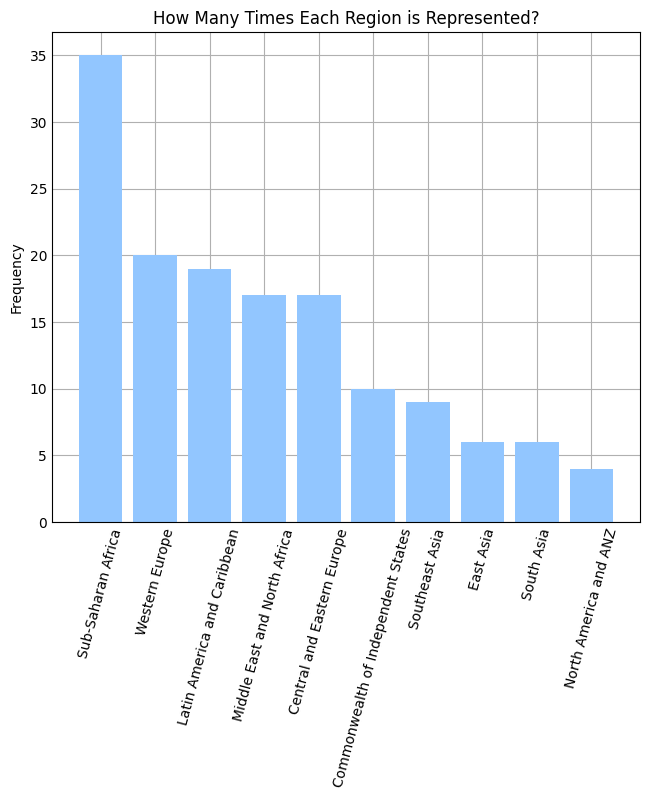

In [411]:
def bar_plot(variable):
    var = data2[variable]  #data1 için içinde Regional indicator verisi yoktur o yüzden data2 alındı.
    varValue = var.value_counts()
    plt.figure(figsize=(6, 5))
    plt.bar(varValue.index, varValue)
    plt.xticks(rotation=75)
    plt.ylabel("Frequency")
    plt.title("How Many Times Each Region is Represented?")
    plt.show()

bar_plot("Regional indicator")


#### "Sub-Saharan Africa" bölgesi en fazla veriye sahip (yaklaşık 35 adet veri içeriyor).
#### "North America and ANZ" en az temsil edilen bölge (yaklaşık 4-5 adet veri içeriyor).

### 5.3 Heatmap Kullanarak Görselleştirme

#### Bu kod, data2 veri kümesindeki sayısal değişkenler arasındaki korelasyonu hesaplayarak, bunu bir heatmap (ısı haritası) olarak görselleştirir. 

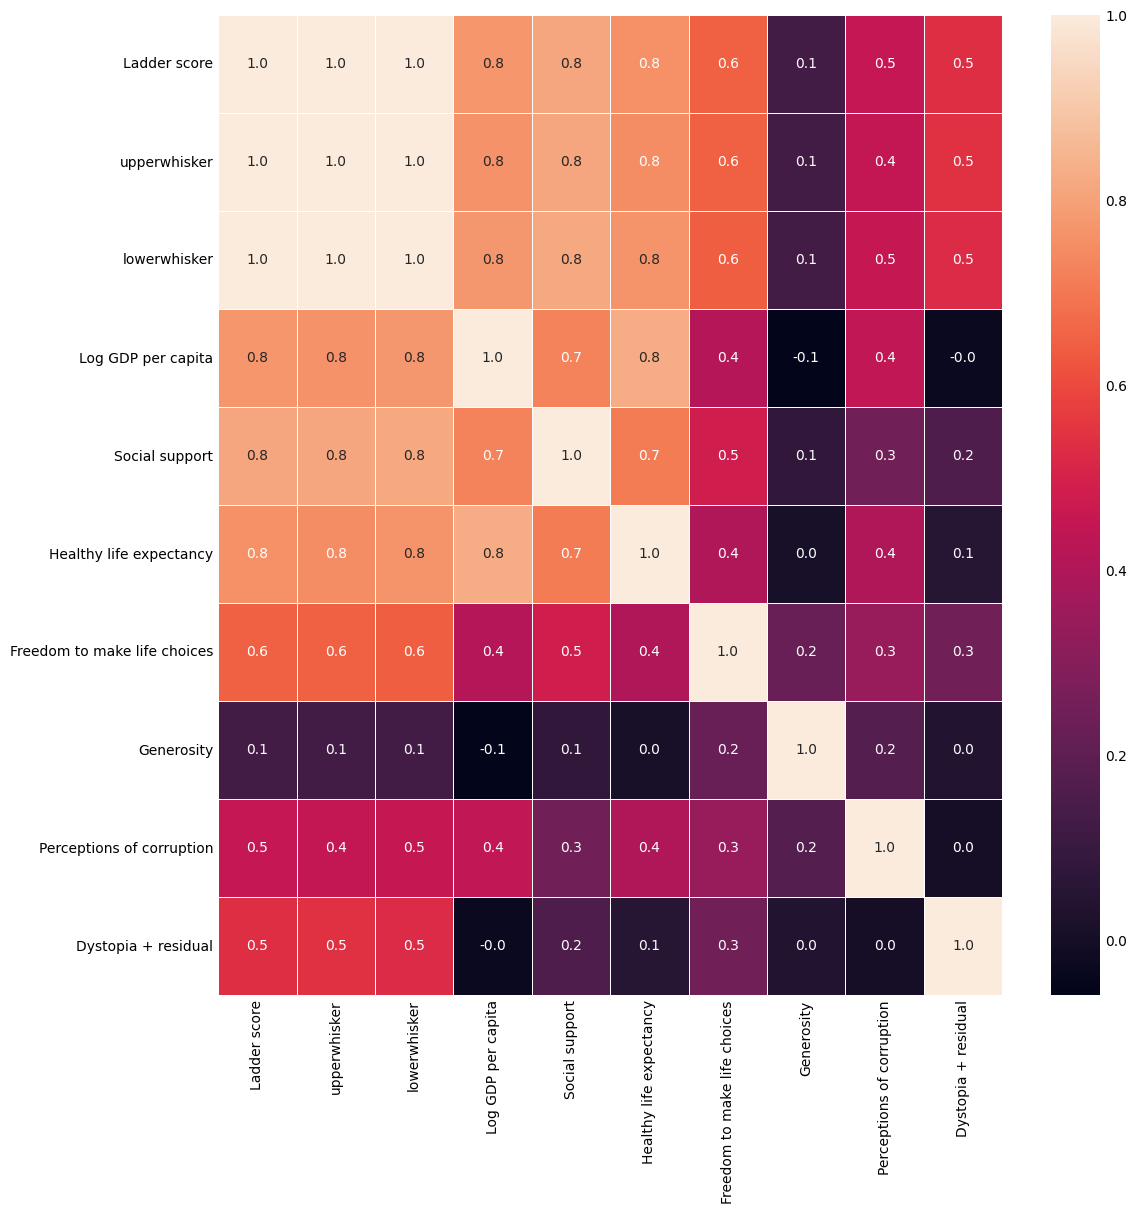

In [412]:
heatmap = data2.drop(columns=["Country name"]).select_dtypes(include=["float64", "int64"]) #Bazı değerler integer ve float tipinde olmadığı için select_types fonksiyonu ile sadece float ve integer değerleri seçildi.
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heatmap.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.show()

### **1. "Ladder score", "upperwhisker" ve "lowerwhisker": 1.0 (tam korelasyon) yani çok güçlü bir korelasyon içinde.**
### **2. "Log GDP per capita" ve "Generosity" arasında -0.1 gibi bir negatif korelasyon var, yani bu iki değişken ters orantılı ama zayıf bir ilişkide.**

### 5.4 Farklı verilere göre Histogram Grafiği

#### Bu kod, "Generosity", "Social support" ve "Freedom to make life choices" değişkenlerinin histogramlarını çizer.

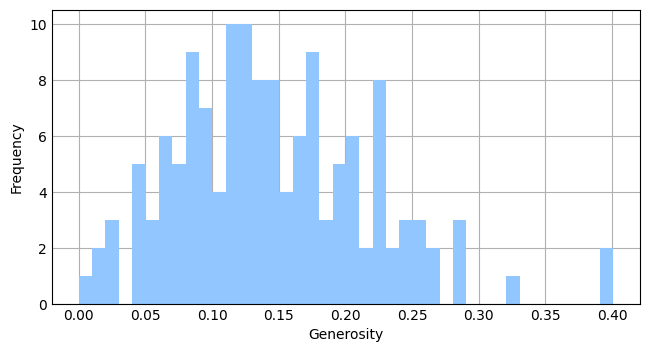

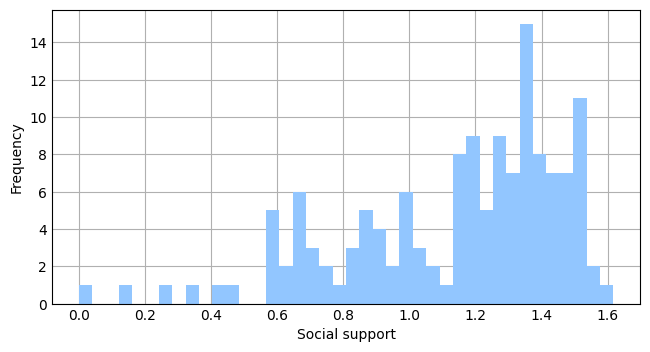

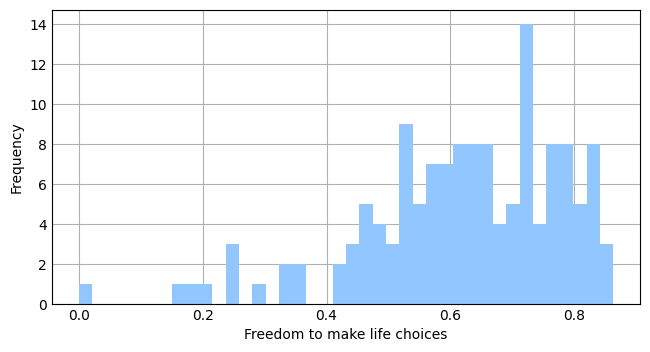

In [413]:
def plot_hist(variable):
    plt.figure(figsize=(6,3))
    plt.hist(data2[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.show
    
numVar=["Generosity", "Social support", "Freedom to make life choices"]
for n in numVar:
    plot_hist(n)    


#### 1. "Generosity": Genellikle 0.1 civarında, düşük cömertlik daha yaygın.
#### 2. "Social Support": 1.2-1.5 arasında yoğunlaşmış, yüksek sosyal destek daha yaygın.
#### 3. "Freedom to Make Life Choices": Çoğu ülke 0.5-0.8 arasında, düşük özgürlüğe sahip ülkeler az.

### 5.5 En Mutlu ve En Mutsuz Ülkeler

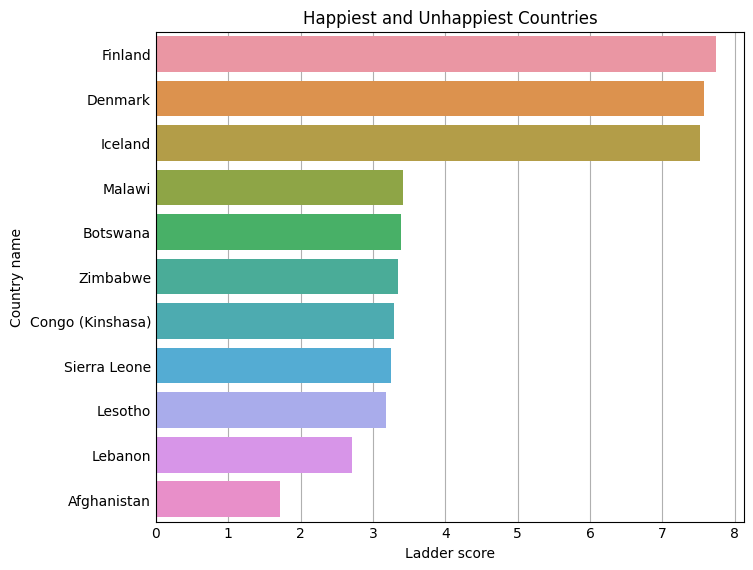

In [414]:
happiest_unhappiest = data2[(data2.loc[:,'Ladder score']>7.4)|(data2.loc[:,'Ladder score']<3.5)]  #data1 içinde Ladder Score verisi olmadığı için data2 verisini aldık.
def happiest(variable):
    plt.figure(figsize=(6, 5))
    sns.barplot(x = "Ladder score", y = "Country name", data=happiest_unhappiest)
    plt.title("Happiest and Unhappiest Countries")
    plt.show()

happiest("Country name")

#### Bu grafiğe göre en mutlu ülke Finladiya, en mutsuz ülke ise Afganistan olarak gösterilmiştir.

### 5.6 Bölgelere Göre Violin Plot Kullanarak Sağlık Yaşam Beklenti Grafiği  

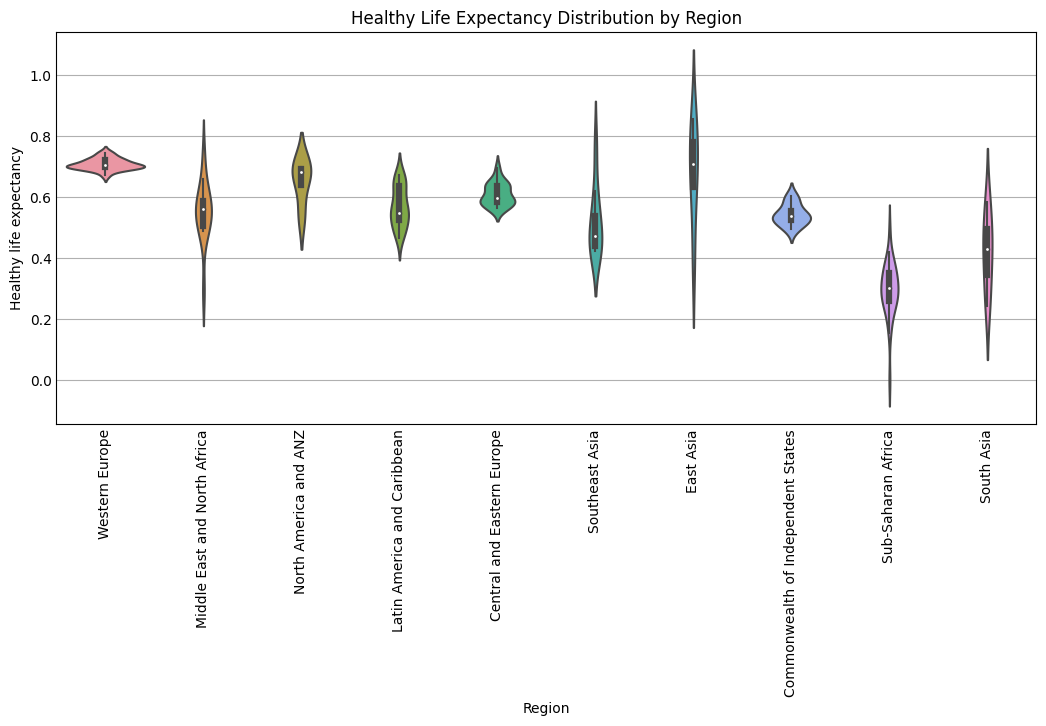

In [415]:
def plot_violin(variable):
    plt.figure(figsize=(10,4))
    sns.violinplot(data=data2, x="Regional indicator", y="Healthy life expectancy")
    plt.xticks(rotation=90)
    plt.xlabel("Region")
    plt.ylabel("Healthy life expectancy")
    plt.title("Healthy Life Expectancy Distribution by Region")
    plt.show()
    
plot_violin("Healthy life expectancy")

#### Western Europe (Batı Avrupa) gibi bölgelerde sağlıklı yaşam beklentisi genellikle yüksek ve dağılım dar (yani ülkeler arasında büyük fark yok).
#### East Asia gibi bölgelerde geniş bir dağılım var, yani bazı ülkelerde sağlıklı yaşam süresi düşükken bazı ülkelerde daha yüksek olabilir.

### 5.7 Swarm Plot Yöntemi İle Cömertlik Dağılımı

#### **Bu kod, "Generosity" (Cömertlik) değişkeninin bölgesel dağılımını bir swarm plot (arı kovanı grafiği) ile görselleştirir.**

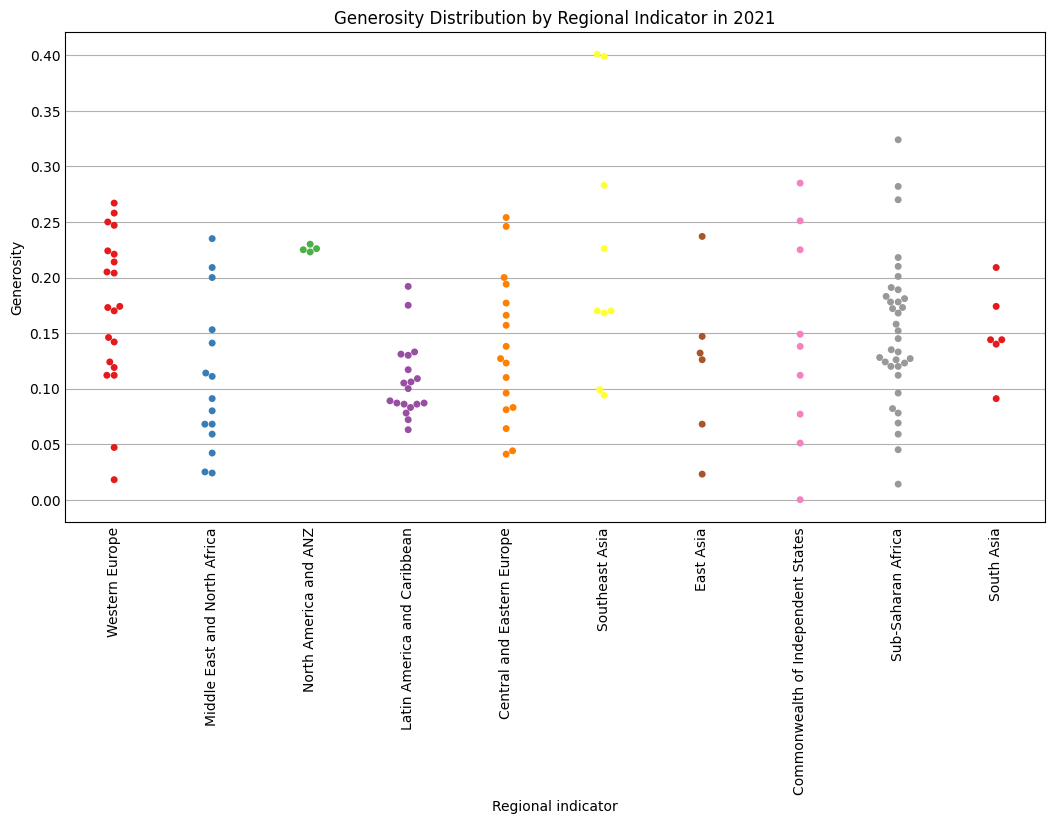

In [416]:
def swarm_plot(variable):
    plt.figure(figsize=(10,5))
    sns.swarmplot(data=data2, x = "Regional indicator", y = "Generosity", palette="Set1")  #data2 içinde Regional Indicator verisi olmadığı için data2 verisini aldık.
    plt.xticks(rotation = 90)
    plt.title("Generosity Distribution by Regional Indicator in 2021")
    plt.show()

swarm_plot("Generosity")

#### * Western Europe bölgesinde genellikle yüksek cömertlik skorları gözlemleniyor.
#### * Sub-Saharan Africa bölgesinde ise değerler daha geniş bir dağılıma sahip.
#### * Bazı bölgelerde tek bir noktada yoğunlaşma var, bu da ülkelerin benzer değerlere sahip olduğunu gösteriyor.


### 5.8 Verilere Bölgelere göre Karşılaştırma Yapan Grafik
#### **Bu kod, "Social support", "Perceptions of corruption" ve "Dystopia + residual" değişkenlerinin bölgelere göre dağılımını bir box plot (kutu grafiği) ile görselleştirir.**

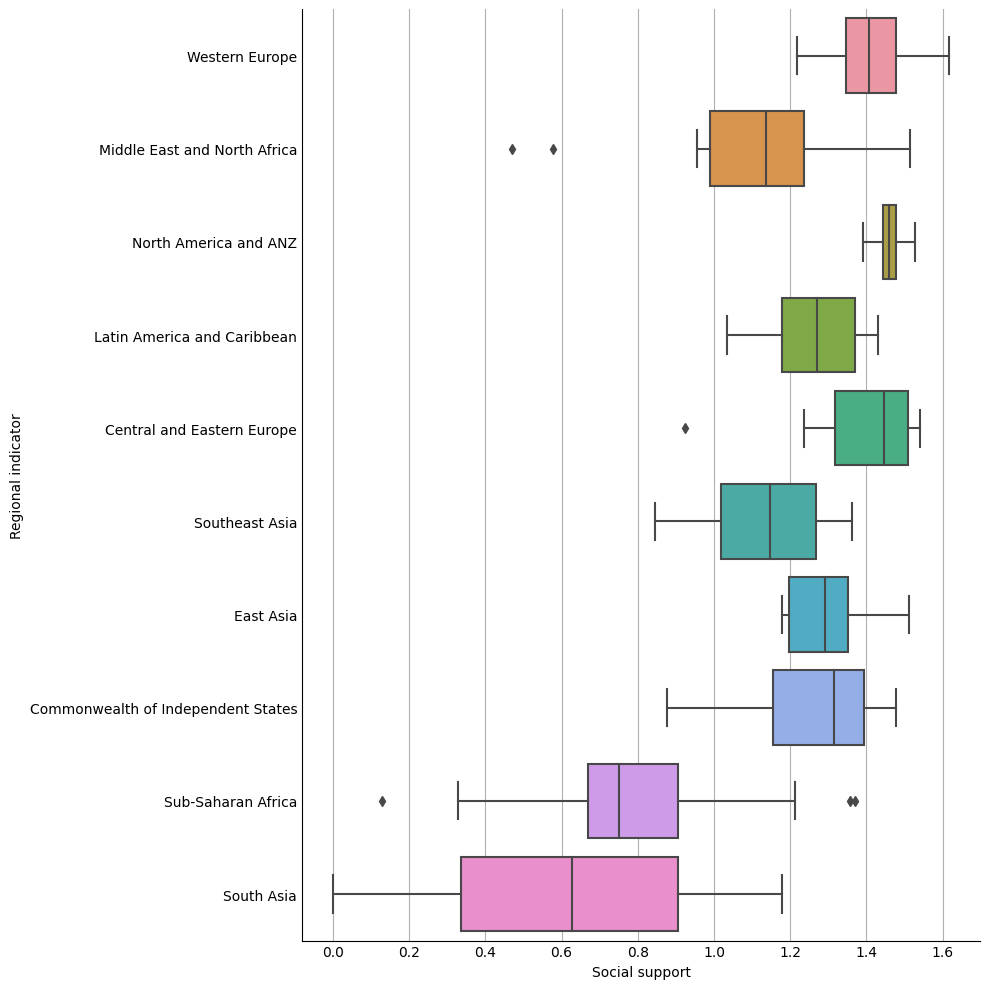

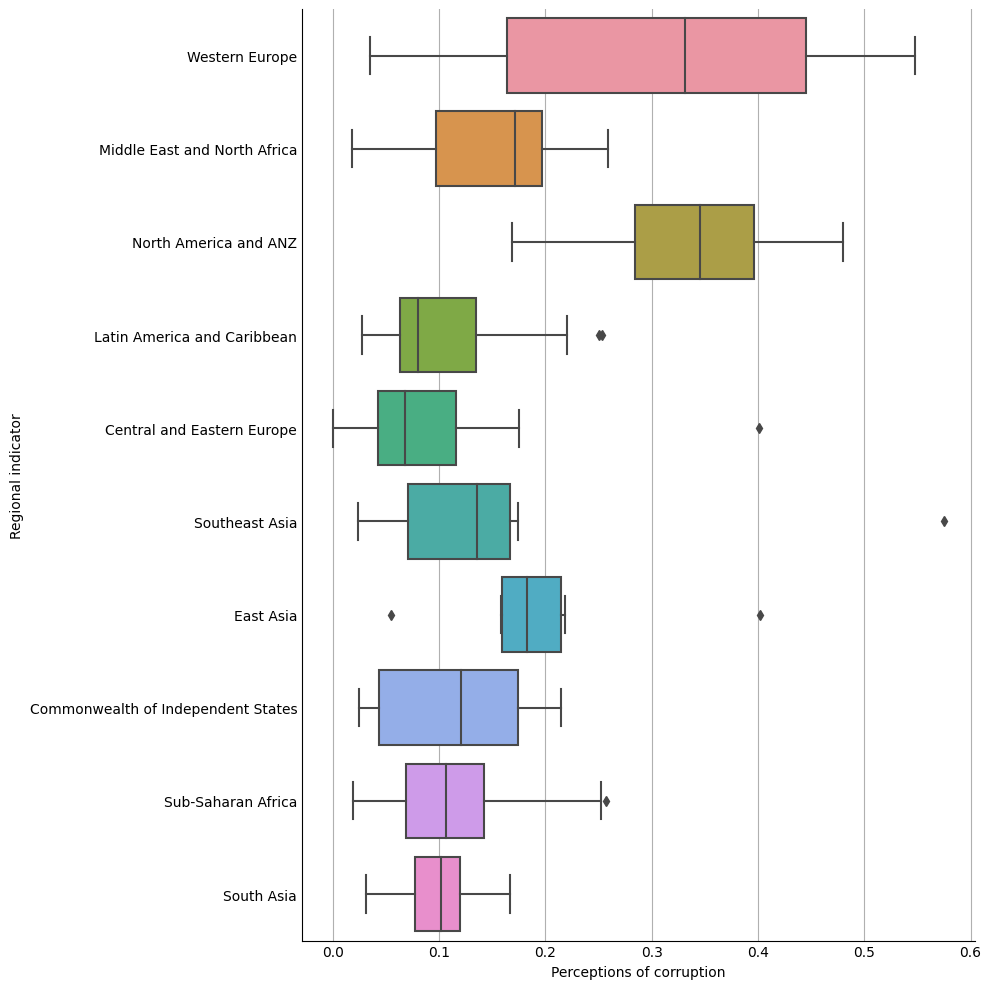

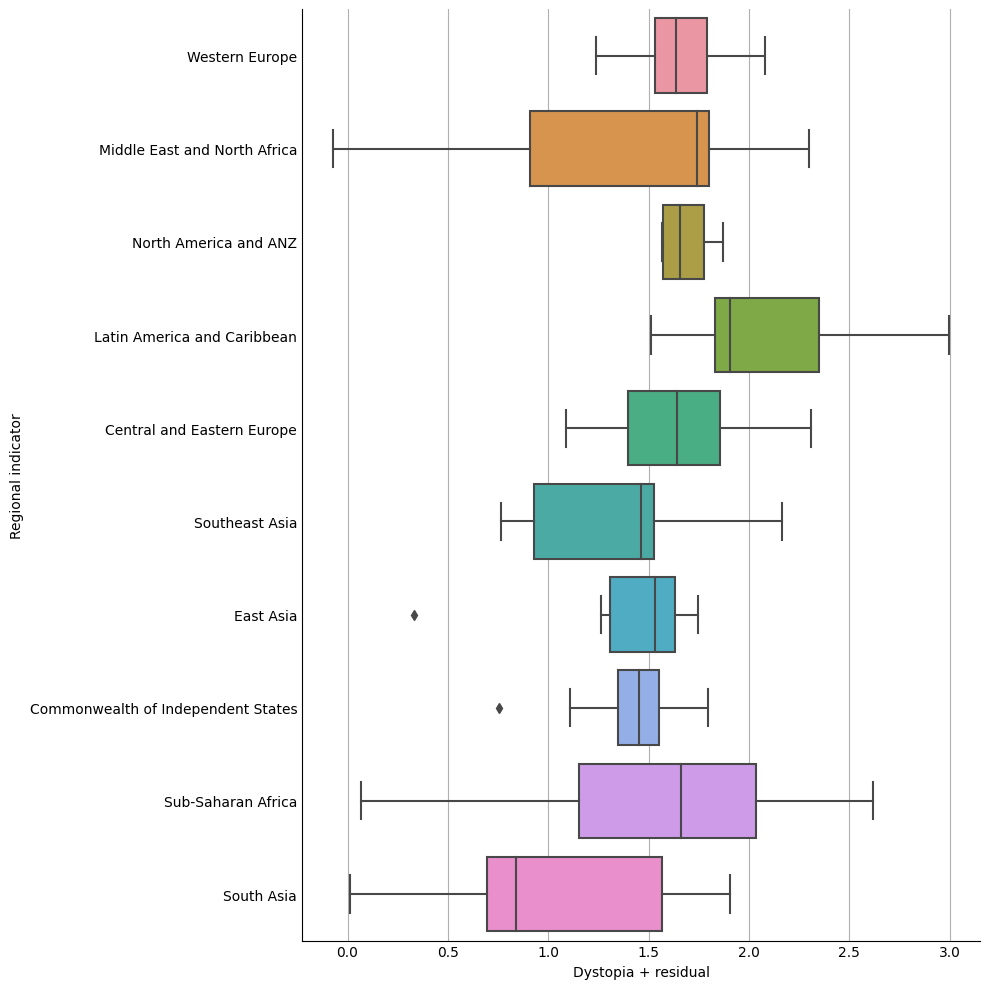

In [417]:
data_list = ['Social support','Perceptions of corruption','Dystopia + residual']
def catplot(variable):
    compare= sns.catplot(x = variable, y = "Regional indicator", data = data2, kind = "box", height = 10)
    plt.show()

for i in data_list:
    catplot(i)

1. **İlk Grafik: Social Support (Sosyal Destek) Dağılımı**
* Western Europe ve North America and ANZ bölgelerinde sosyal destek en yüksek.
* South Asia ve Sub-Saharan Africa bölgelerinde sosyal destek seviyesi oldukça düşük.
* Outlier (aykırı) değerler bazı bölgelerde mevcut, yani bazı ülkelerde sosyal destek ortalamanın dışında.
2. **İkinci Grafik: Perceptions of Corruption (Yolsuzluk Algısı) Dağılımı**
* Western Europe bölgesinde yolsuzluk algısı genellikle düşük, ancak dağılım geniş.
* Sub-Saharan Africa ve South Asia bölgelerinde yolsuzluk algısı oldukça yüksek ve dağılım büyük.
* Bazı bölgelerde (örneğin North America and ANZ) çok fazla değişkenlik yok, yolsuzluk algısı belirli bir aralıkta kalıyor.
3. **Üçüncü Grafik: Dystopia + Residual (Distopya ve Artık Değer) Dağılımı**
* South Asia ve Sub-Saharan Africa bölgelerinde distopya skoru yüksek.
* Western Europe ve North America and ANZ bölgelerinde bu değer daha düşük.
* Bazı bölgelerde geniş kutular görülmesi, ülkeler arasında büyük farklar olduğunu gösteriyor.